**Veronica Sonzini - AI - Module Assignment**


# Analysis of Breast Cancer Dataset for Breast Cancer Detection.

##Introduction
Breast cancer is a significant global health problem. Every single year, over 1.6 million people are diagnosed with the disease, and while advances in early detection and treatment have improved survival rates, breast cancer still claims the lives of 500,000 people around the world every year, around 11,000 of whom are here in the UK. 

That’s partly because accurately detecting and diagnosing breast cancer still remains a huge challenge.

When detected in its early stages, there is a 30% chancethat the cancer can be treated eﬀectively, but the late de-tection of advanced-stage tumors makes the treatment morediﬃcult 

Currently, the most used techniques to detect breast cancer in early stages are: mammography (63% to 97% correctness), FNA (Fine Needle Aspiration) with visual interpretation (65% to 98% correctness) and surgical biopsy (approximately 100% correctness). Therefore, mammography and FNA with visual interpretation correctness varies widely, and the surgical biopsy, although reliable, is invasive and costly. 


![alt text](http://resources.ama.uk.com/glowm_www/graphics/figures/v1/0270/016f.jpg)

Image of FNA technique

## The Data Set and the Problem
[Breast Cancer Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29
)

###Problem
Currently, the most used techniques to detect breast cancer in early stages are: mammography (63% to 97% correctness), FNA (Fine Needle Aspiration) with visual interpretation (65% to 98% correctness) and surgical biopsy (approximately 100% correctness). 

**Therefore, mammography and FNA with visual interpretation correctness varies widely, and the surgical biopsy, although reliable, is invasive and costly.**
    
This coursework discuss a diagnosis technique that uses the FNA (Fine Needle Aspiration) with machine learning and aims to create a classiﬁer that provides a high level of accuracy, with a low rate of false-negatives. 


***QUESTION: Can we predict if a tumor in the breast is cancerous or not, based on results obtainned in a Fine Needle Aspiration?***

###What we can do once the problem is solved
Solving this problem will help to reduce the high
    number of unnecessary breast biopsies. This could
    help physicians in their decision to perform a breast biopsy on a suspicious
    lesion seen in a mammogram or to perform a short term follow-up
    examination instead.

###Type of data found in the data set
**Number of Instances: 699.**

This dataset is widely utilized for this kind of application because it has a large number of instances (699), is virtually noise-free and has just a few missing values. Before performing the tests, a large fraction of this work will be dedicated for pre-processing the data in order to optimize the classifier.

Each feature is evaluated on a scale of 1 to 10, with 1 being the closest to benign and 10 the closest to malignant. Statistical analysis showed that the following nine characteristics differ signiﬁcantly between benign and malignant samples: uniformity of cell shape, uniformity of cell size, clump thickness, bare nuclei, cell size, normal nucleoli, clump cohesiveness, nuclear chromatin and mitoses.
  
  Attributes:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. **Class: (2 for benign, 4 for malignant)** This will be out target (what we want to predict)

### Type of problem: 
This is a **classification** problem, since the main goal is to identify the cathergory or class to which new data will fall under: **Benign** or **Malignant**. 

The predictions will be made using **supervised** learning because we'll act as a guide to teach the algorithm what conclusions it should come up with.

#Pre-Processing the data
Considering the data set adopted, the pre-processing will focus on managing the missing attributes and the number of attributes used to train the classiﬁer. Cleaning the data is crucial here to get sensible models. 

##Cleaning the data set: replacing attribute missing values
The data can be considered ‘noise-free' and has 16 missing values, which are the Bare Nuclei for 16 different instances, from group 1 to 6. 
The missing values are represented by "**?**".
 
In order to clean this up, we are going to replace all missing values with **-99999**. By replacing the **?** with such a large number, most algorithms will recognize this as an **outlier**, and will treat it as such, as opossed to removing the data completely. If we were to drop everything with a missing data, we would maybe sacrifice a large percentage of it. 

When we look at our data set, we can see that the column **"ID"** doestn't have any implication as to wether or not a tumor can be bening or malignant. So we can remove this column completely. 

In [43]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
columns = [
 "id", "clump_thickness", "unif_cell_size", "unif_cell_shape", "marg_adhesion", "single_epith_cell_size", "bare_nuclei", "bland_chrom", "norm_nucleoli", "mitoses", "class"
]

raw_data = pd.read_csv(url, names=columns, index_col=False)
data_set = raw_data.copy(deep=True)

## Cleanning data:
# Replacing missing values
data_set.replace('?', -99999, inplace=True)

# Normalisation of data: replacing values in 'class' column: 2(bening) and 4(malignant) for 0(bening) and 1(malignant)
data_set['class'] = data_set['class'].map({2:0, 4:1})

new_columns = ["clump_thickness", "unif_cell_size", "unif_cell_shape", "marg_adhesion", "single_epith_cell_size", "bare_nuclei", "bland_chrom", "norm_nucleoli", "mitoses", "class"]

# Dropping unnecessary columns (ID)
data_set.drop(['id'],1, inplace=True)

# Print the first 10 rows of the data set
data_set.head(10)

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


#The Models

##Review of model evaluation procedures

###Motivation: 
Need a way to choose between machine learning models
  - Goal is to estimate likely performance of a model on **out-of-sample data**
  

###Initial idea:
Train and test on the same data
  - But, maximizing **training accuracy** rewards overly complex models which **overfit** the training data
  
###Alternative idea:
  - Split the data set into two pieces, so that the model can be trained and tested on **different data**
  - **Testing accuracy** is better estimate than training accuracy of out-of-sample performance
  - But, it provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
  
  
Our first idea was to train each model on the entire data set, and then evaluate each model by testing how well it performs on tha same data. This will produce an evaluation metric known as **training accuracy**. Unfortunately training accuracy rewards **overly complex models** that are unlikely to generalize feature data, which is known as **overfiting** the trainig data. The alternative procedure we came up with is called **train/test split**, in which we split up the data set into two pieces know as the **training and testing sets**, we train the model on the training set  and we evaluate the model by testing its performance with the testing set.

The resulting evaluation metric is know as **testing accuracy**, which is a better estimate of out of sample performance than training accuracy, because we trained and tested the model on different sets of data. As well, testing accuracy does not reward  overly complex models, and thus it helps up to avoid overfiting.

However, there is a drawback to the train/test split procedure. It turns out that the testing accuracy is a **high variance** estimate of out-of-sample accuracy, meaning that testing accuracy can change a lot depending on which observations happened to be in the testing set. 


#K-fold cross-validation

  1. Split the data set into K **equal** partitions (or "folds")
  2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
  3. Calculate **testing accuracy**.
  4. Repeat steps 2 and 3 K times, using different fold as the testing set each time.
  5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.
  
  ##Comparing cross-validation to train/test split
  ###Advantages of cross-validation
    - More accurate estimate of out-of-sample accuracy
    - More "efficient" use of data (every observation is used for both training and testing)
    
###Advantages of train/test split
  - Runs K times faster
  - Simpler to examine the detailed results of the testing process
  
  
  
  
  


#K-Nearest Neighbors
The goal of this algorithm is to find groups in the data. Rather than defining groups before looking at the data, clustering allows us to find and analyse the groups that have formed organically. 

The accuracy of K-means was low, so to train the models we are going to use the pre-clustered data. 


In [0]:
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn import cross_validation
from sklearn import metrics, neighbors
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# X will be the features: everything except the class column which is our target
X = np.array(data_set.drop(['class'], 1))

# y will be the labels, so basically just our class. 
y = np.array(data_set['class'])

In [45]:
# Search for an optimal value of k for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())
print(k_scores)

[0.9573032397282246, 0.9429347097075207, 0.9629151721925758, 0.9657930189834663, 0.9686501618406089, 0.967242294345785, 0.9715285918409006, 0.9644058554223894, 0.9672629982795323, 0.9658344268509609, 0.9686915697081038, 0.9658344268509609, 0.9658344268509609, 0.9644058554223894, 0.9658344268509609, 0.9658344268509609, 0.9644058554223894, 0.962977283993818, 0.962977283993818, 0.9644058554223894, 0.9644058554223894, 0.9615487125652467, 0.9615487125652467, 0.9601402618610212, 0.9615487125652467, 0.9601402618610212, 0.9615487125652467, 0.9587116904324497, 0.9601201411366752, 0.9587116904324497]


Text(0,0.5,'Cross-validated Accuracy')

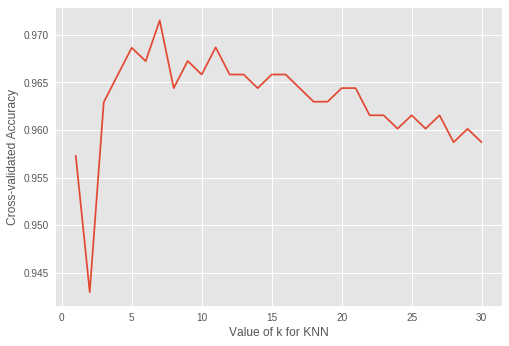

In [46]:
import matplotlib.pyplot as plt

# Plot the value of k for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validated Accuracy')

The maximum cross-validated accuracy occurs at k=7. The general shape of the curve is quite typical when examining the  relationship between a model complexity parameter  and the model accuracy. This is an example of the bias variance tradeoff in which lower values of k produce a model with low bias and high variance, and high values of k produce a model with high bias and low variance. The best model  is found in the middle, because it appropriately balances bias and variance, and thus is more likely to generalize the out-of-sample data. 
When deciding which exact value of k to call the best it is generaly recomended to choose the value which produces the simplest model. In the case of KNN, higer values of k produced low complexity models and thus will choose k=7 as our single best KNN model. 

# Logistic Regression

Logistic regression is a powerful statistical way of modeling a binomial outcome with one or more explanatory variables. It measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative logistic distribution.
###Logistic Regresion use cases
  - Predicting the Customer Churn
  - Credit Scoring & Fraud Detection
  - Measuring the effectiveness of marketing campaigns


In [47]:
# 10-fold cross-validation with Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

predicted = cross_validation.cross_val_predict(logreg, X, y, cv=10)
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))



0.9599427753934192
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       458
          1       0.95      0.93      0.94       241

avg / total       0.96      0.96      0.96       699



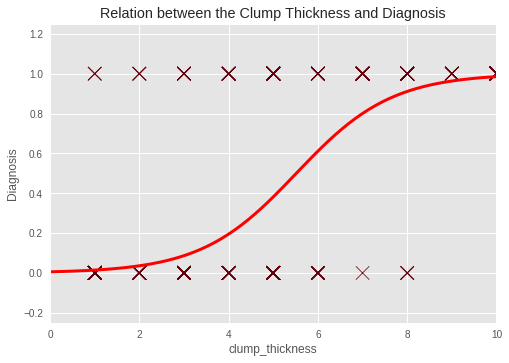

In [111]:

# Compare how doing Logistic Regression with 1 feature, gives low accuracy compared with using the whole data set

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

X = np.array(data_set['clump_thickness'])
y = np.array(data_set['class'])

X = X.reshape(-1, 1)

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(X, y)

plt.style.use('ggplot')
fig, ax = plt.subplots()

x = data_set['clump_thickness']
y = data_set['class']

my_scatter_plot = ax.scatter(x, y, c=data_set['clump_thickness'], marker='x', s=180, cmap= plt.cm.Reds, vmin=0, vmax=data_set['class'].max(), edgecolor='6b0c08', linewidth=0.75)

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

plt.title('Relation between the Clump Thickness and Diagnosis')
plt.xlabel('clump_thickness')
plt.ylabel('Diagnosis')

plt.ylim(-.25, 1.25)
plt.xlim(0, 10)

plt.show()

In [109]:
# Accuracy for Clump thickness and Diagnosis
logreg = LogisticRegression()

predicted = cross_validation.cross_val_predict(logreg, X, y, cv=10)
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))

0.7896995708154506
             precision    recall  f1-score   support

          0       0.77      0.97      0.86       458
          1       0.89      0.44      0.59       241

avg / total       0.81      0.79      0.77       699



Appliying Logistic regression to only one feature (Clump thickness) gives an accuracy of only 78%, which compared with the accuracy of the whole data set is very low. 

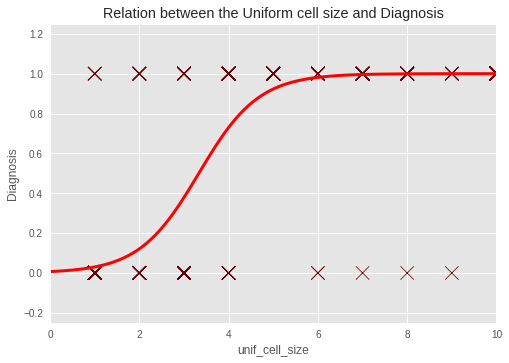

In [106]:
X = np.array(data_set['unif_cell_size'])
y = np.array(data_set['class'])

X = X.reshape(-1, 1)

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(X, y)

plt.style.use('ggplot')
fig, ax = plt.subplots()

x = data_set['unif_cell_size']
y = data_set['class']

my_scatter_plot = ax.scatter(x, y, c=data_set['unif_cell_size'], marker='x', s=180, cmap= plt.cm.Reds, vmin=0, vmax=data_set['class'].max(), edgecolor='6b0c08', linewidth=0.75)

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

plt.title('Relation between the Uniform cell size and Diagnosis')
plt.xlabel('unif_cell_size')
plt.ylabel('Diagnosis')

plt.ylim(-.25, 1.25)
plt.xlim(0, 10)

plt.show()

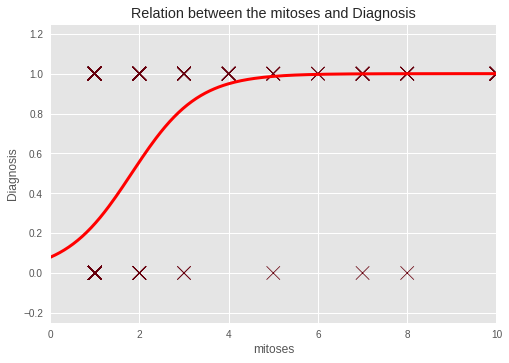

In [108]:
X = np.array(data_set['mitoses'])
y = np.array(data_set['class'])

X = X.reshape(-1, 1)

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(X, y)

plt.style.use('ggplot')
fig, ax = plt.subplots()

x = data_set['mitoses']
y = data_set['class']

my_scatter_plot = ax.scatter(x, y, c=data_set['mitoses'], marker='x', s=180, cmap= plt.cm.Reds, vmin=0, vmax=data_set['class'].max(), edgecolor='6b0c08', linewidth=0.75)

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

plt.title('Relation between the mitoses and Diagnosis')
plt.xlabel('mitoses')
plt.ylabel('Diagnosis')

plt.ylim(-.25, 1.25)
plt.xlim(0, 10)

plt.show()

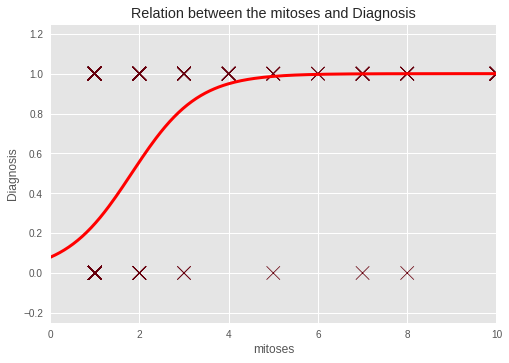

In [112]:
X = np.array(data_set['mitoses'])
y = np.array(data_set['class'])

X = X.reshape(-1, 1)

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
clf.fit(X, y)

plt.style.use('ggplot')
fig, ax = plt.subplots()

x = data_set['mitoses']
y = data_set['class']

my_scatter_plot = ax.scatter(x, y, c=data_set['mitoses'], marker='x', s=180, cmap= plt.cm.Reds, vmin=0, vmax=data_set['class'].max(), edgecolor='6b0c08', linewidth=0.75)

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

plt.title('Relation between the mitoses and Diagnosis')
plt.xlabel('mitoses')
plt.ylabel('Diagnosis')

plt.ylim(-.25, 1.25)
plt.xlim(0, 10)

plt.show()

# Linear SVC (Support Vector Machine)

Support vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In [0]:
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib import style
style.use("ggplot")

LinSvc = svm.SVC(kernel='linear', C = 1.0)
print(cross_val_score(LinSvc, X, y, cv=10, scoring='accuracy').mean())


0.9428950514682299


In [0]:
predicted = cross_validation.cross_val_predict(LinSvc, X, y)
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))

0.944206008583691
             precision    recall  f1-score   support

          0       0.96      0.95      0.96       458
          1       0.91      0.93      0.92       241

avg / total       0.94      0.94      0.94       699



#Naive Bayes
Naïve Bayes (NB) classifier is a probabilistic classifier based on the Bayes theorem. Rather than predictions,
the Naïve Bayes classifier produces probability estimates. For each class value they estimate the probability that a
given instance belongs to that class. It assumes that the effect of an attribute value on a given class is independent of
the values of the other attributes. This assumption is called class conditional independence

We could predict whether a mass lesion is benign or malignant(class) based on its features ("clump_thickness", "unif_cell_size", "unif_cell_shape", "marg_adhesion", "single_epith_cell_size", "bare_nuclei", "bland_chrom", "norm_nucleoli", "mitoses", "class"]).
The data set used can be considered small, since it's formed of 699 cases. In this case, Naive Bayes is a good choice because it performs very well even with small data sets. 

Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods. Naive Bayes is also a good choice when CPU and memory resources are a limiting factor

###Naive-Bayes use cases
  - Spam detection
  - Customer classification
  - Credit risk prediction
  - **Health risk prediction**

##Two types of Naive-Bayes 
###Bernoulli Model 
Good for making predictions from binary features.
###Gaussian Model 
Good for making predictions from normally distributed features. 

In [0]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

# Bernoulli model 
BernNB = BernoulliNB(binarize=True)
print(cross_val_score(BernNB, X, y, cv=10, scoring='accuracy').mean())


0.9414469425247136


In [0]:
predicted = cross_validation.cross_val_predict(BernNB, X, y)
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))

0.9384835479256081
             precision    recall  f1-score   support

          0       0.99      0.92      0.95       458
          1       0.86      0.98      0.92       241

avg / total       0.94      0.94      0.94       699



In [0]:
# Gaussian model
GausNB = GaussianNB()

print(cross_val_score(GausNB, X, y, cv=10, scoring='accuracy').mean())

0.9571813489633454


In [0]:
predicted = cross_validation.cross_val_predict(GausNB, X, y)
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))

0.9556509298998569
             precision    recall  f1-score   support

          0       0.98      0.95      0.97       458
          1       0.91      0.96      0.94       241

avg / total       0.96      0.96      0.96       699



#Conclusion

##Results 
###K-Nearest Neighbors accuracy: 96.86%
###Logistic Regression accuracy: 96.00%
###Linear SVC accuracy: 94.28%
###Naive-Bayes Bernoulli: 94.14%
###Naive-Bayes Gaussian: 95.71%

##**We would conclude that K-Nearest Neighbors is likely the best choice for this particular task. **
In this paper we investigated the use of four distinct machine learning techiniques for breast cancer diagnosis. The ﬁrst algorithm, K-Nearest Neighbors, demonstrated the best accuracy with 96.86%. 

All our models performed at 94% + accuracy. 

###Performance and Robustness
The performance of these models was very good. All models performed extremelly well. Our highest score was 96.86% with K-Nearest Neighbors. 

Given the results obtained, these models appear to be very robust. 


#Recomendations
  - More analysis is recommended to see if we can improve the accuracy.  
  - Add more data: Having more data is always a good idea. It allows the “data to tell for itself,” instead of relying on assumptions and weak correlations. Presence of more data results in better and accurate models. 
  - Multiple algorithms: Hitting at the right machine learning algorithm is the ideal approach to achieve higher accuracy. But, it is easier said than done. This intuition comes with experience and incessant practice. Some algorithms are better suited to a particular type of data sets than others. Hence, we should apply all relevant models and check the performance.
